In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [2]:
import time

<br>
<br>
<br>

### Data Collection

In [3]:
# importing scaled training data
train_data = pd.read_csv("../data/train_scaled_std.csv")
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.214182,-0.159429,0.663801,-0.231630,-0.373311,1.303453,-0.310649,-0.562501,0.136562,0.933169,1.638215,6
1,0.548293,-1.314684,2.470184,-0.115164,0.427602,1.303453,0.539042,0.980993,0.066281,0.208049,2.318768,6
2,-0.742049,-0.101666,-1.248839,-0.348097,-0.963457,-1.394584,-1.129995,-0.080843,1.471893,0.643121,0.860440,7
3,-0.155530,1.977792,-0.239390,0.234236,0.090375,-0.595165,0.478350,0.302294,-0.777086,-0.807119,-0.597888,5
4,0.079077,-0.968107,0.185641,-0.115164,-0.120391,-0.695093,-0.128573,-1.263094,-0.777086,5.211378,-0.889553,6


In [4]:
# importing scaled test data
test_data = pd.read_csv("../data/test_scaled_std.csv")
test_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.683397,-0.101666,-1.355097,-0.464564,-0.204698,1.403381,0.144543,0.400815,0.558245,-0.372047,-0.597888
1,-0.683397,1.313520,-0.611292,-0.464564,0.849135,-0.295383,-0.432034,-0.485873,0.136562,0.280561,-0.403444
2,0.020425,-0.390480,0.716930,-0.464564,-0.710537,0.404108,0.023158,0.543122,-1.620453,0.063025,-0.889553
3,-0.214182,-0.332717,0.716930,-0.697497,-1.089917,-0.295383,-0.735495,-1.066052,-0.074280,0.063025,1.249328
4,-1.093961,-1.083633,0.291899,-0.348097,-1.595756,-0.894947,1.358388,-1.744751,-0.566244,-1.169679,2.318768


<br>
<br>
<br>

### Data Preparation

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# seperating X
X = train_data.drop(['quality'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.214182,-0.159429,0.663801,-0.231630,-0.373311,1.303453,-0.310649,-0.562501,0.136562,0.933169,1.638215
1,0.548293,-1.314684,2.470184,-0.115164,0.427602,1.303453,0.539042,0.980993,0.066281,0.208049,2.318768
2,-0.742049,-0.101666,-1.248839,-0.348097,-0.963457,-1.394584,-1.129995,-0.080843,1.471893,0.643121,0.860440
3,-0.155530,1.977792,-0.239390,0.234236,0.090375,-0.595165,0.478350,0.302294,-0.777086,-0.807119,-0.597888
4,0.079077,-0.968107,0.185641,-0.115164,-0.120391,-0.695093,-0.128573,-1.263094,-0.777086,5.211378,-0.889553


In [7]:
# seperating y
y = train_data[['quality']]
y.head()

,quality
0,6
1,6
2,7
3,5
4,6


In [8]:
# creating validation set
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y.quality, random_state=42)

In [9]:
# checking shapes
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1644, 11)
(412, 11)
(1644, 1)
(412, 1)


In [10]:
# verifying proportions
y_train.value_counts() / len(y_train)

quality
5          0.408151
6          0.378345
7          0.161800
4          0.026764
8          0.018856
3          0.006083
dtype: float64

In [12]:
# verifying proportions
y_val.value_counts() / len(y_val)

quality
5          0.407767
6          0.378641
7          0.162621
4          0.026699
8          0.019417
3          0.004854
dtype: float64

<br>
<br>
<br>

### Model Selection

In [29]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

In [14]:
# quadratic weighted kappa
def quad_kappa(y, y_pred):
    return cohen_kappa_score(y, y_pred, weights='quadratic')

In [15]:
# making custom scorer
custom_scorer = make_scorer(quad_kappa, greater_is_better=True)

<br>

#### random forest

In [69]:
# random forest classifier
forest = RandomForestClassifier(max_depth=4, min_samples_split=10)

In [70]:
# training model
forest.fit(x_train, np.ravel(y_train))

RandomForestClassifier(max_depth=4, min_samples_split=10)

In [71]:
# score on training data
predictions = forest.predict(x_train)
quad_kappa(np.ravel(y_train), predictions)

0.47444420790996866

In [72]:
# score on validation data
predictions = forest.predict(x_val)
quad_kappa(np.ravel(y_val), predictions)

0.45264069669444706

In [73]:
# cross validation score
scores = cross_val_score(forest, x_train, y_train, cv=10, n_jobs=-1, scoring=custom_scorer)
scores.mean()

0.4271704021973323

<br>
<br>
<br>

#### ensemble

In [16]:
# creating ensemble of classifiers
classifiers = {
    'random_forest': RandomForestClassifier(random_state=42),
    'extra_trees': ExtraTreesClassifier(random_state=42),
    'lgbm': LGBMClassifier(random_state=42),
    'xg_boost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    # 'cat_boost': CatBoostClassifier(random_state=42, verbose=False),
}

In [17]:
# grid search space

# random forest
RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

# boosting algorithms (xg_boost, lgbm, cat_boost)
boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

In [18]:
# mapping models to parameter grid
grid = {
    "random_forest" : RF_grid,
    "extra_trees" : RF_grid,
    "lgbm" : boosted_grid,
    "xg_boost" : boosted_grid,
    "cat_boost" : boosted_grid,
}

In [19]:
# index of current model
i: int =0

# holds best params for classifier
clf_best_params = classifiers.copy()

# holds validation score and training time of each model
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})


for key, classifier in classifiers.items():
    # starting timer
    start = time.time()

    # grid search classifier
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None, scoring=custom_scorer)

    # training the model
    clf.fit(x_train, np.ravel(y_train))

    # saving validation score
    valid_scores.iloc[i,1] = clf.score(x_val, np.ravel(y_val))

    # saving best parameters
    clf_best_params[key] = clf.best_params_
    
    # stopping timer
    stop = time.time()

    # saving time taken
    valid_scores.iloc[i,2] = np.round((stop - start) / 60, 2)
    
    # logging data
    print('model:', key)
    print('training score:', valid_scores.iloc[i,1])
    print('training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

model: random_forest
training score: 0.5057277234555317
training time (mins): 0.45

model: extra_trees
training score: 0.4805564996217644
training time (mins): 0.23

model: lgbm
training score: 0.5521069166708223
training time (mins): 2.55



ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kshit\anaconda3\envs\machine_learning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kshit\anaconda3\envs\machine_learning\lib\site-packages\xgboost\core.py", line 506, in inner_f
    return f(**kwargs)
  File "c:\Users\kshit\anaconda3\envs\machine_learning\lib\site-packages\xgboost\sklearn.py", line 1199, in fit
    raise ValueError(label_encoding_check_error)
ValueError: The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].


In [20]:
# best parameters for each classifier
clf_best_params

{'random_forest': {'max_depth': 12, 'n_estimators': 200},
 'extra_trees': {'max_depth': 12, 'n_estimators': 100},
 'lgbm': {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50},
 'xg_boost': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, eval_metric='logloss', gamma=None,
               gpu_id=None, importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=42, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               use_label_encoder=False, validate_parameters=None,
               verbosity=None)}

In [21]:
# validation scores
valid_scores

,Classifer,Validation accuracy,Training time
0,random_forest,0.505728,0.45
1,extra_trees,0.480556,0.23
2,lgbm,0.552107,2.55
3,xg_boost,0.000000,0.00


<br>
<br>
<br>

### Modelling

#### stacking 2 models

In [36]:
# selecting top 2 best performing classifiers
best_classifiers = {
    "random_forest" : RandomForestClassifier(max_depth=12, n_estimators=200, random_state=42, n_jobs=-1),
    "lgbm" : LGBMClassifier(learning_rate=0.1, max_depth=4, n_estimators=50, random_state=42, n_jobs=-1),
}

In [40]:
# number of folds in cross validation
folds: int = 10
# will hold prediction probabilities
preds = np.zeros((len(test_data), 6))

for key, classifier in best_classifiers.items():
    # starting timer
    start = time.time()
    
    # 10-fold cross validation
    cv = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    
    score = 0

    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # getting training and validation sets
        X_train, X_valid = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[val_idx]

        # training model
        clf = classifier
        clf.fit(X_train, np.ravel(y_train))

        # making predictions and measuring accuracy
        preds += clf.predict_proba(test_data)

        val_preds = clf.predict(X_valid)
        score += quad_kappa(np.ravel(y_valid), val_preds)

    # averaging accuracy    
    score = score / folds
    
    # stopping timer
    stop = time.time()

    # print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(score,4))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# ensemble predictions
preds = preds / (folds * len(best_classifiers))

Model: random_forest
Average validation accuracy: 0.4868
Training time (mins): 0.24

Model: lgbm
Average validation accuracy: 0.4878
Training time (mins): 0.03



In [46]:
# will hold final predictions
final_predictions = []

In [47]:
# appending final predictions
for row in preds:
    max_value = max(row)
    index = list(row).index(max_value)
    final_predictions.append(index+3)

In [49]:
# converting to series datatype
pred_series = pd.Series(final_predictions)
pred_series.head()

0    6
1    6
2    6
3    6
4    5
dtype: int64

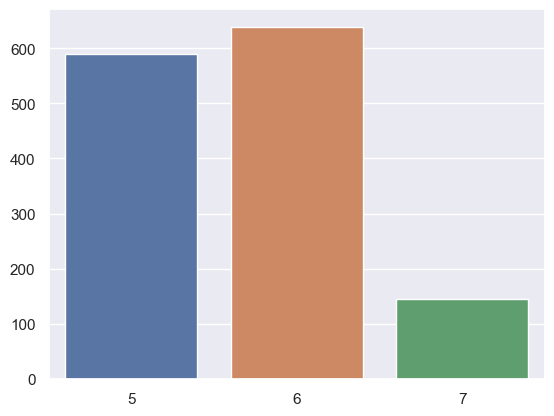

In [50]:
# inspection value distribution
sns.barplot(x=pred_series.value_counts().index, y=pred_series.value_counts().values)
plt.show()